In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from zipfile import ZipFile
file_name = '/content/Dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
import os
import cv2
import numpy as np

# Define the folder path
folder_path = "/content/noisy_dataset"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]

# Create an empty list to store the images
images = []

# Iterate over the image files and read them into the list
for image_file in image_files:
    image = cv2.imread(os.path.join(folder_path, image_file))
    images.append(image)



In [3]:
print("this folder has ", len(images),'images')

this folder has  13 images


In [4]:
# Define the new colorspace you want to convert to (e.g., cv2.COLOR_BGR2GRAY)
new_colorspace = cv2.COLOR_BGR2GRAY
# Loop through the images and convert colorspace for each one
converted_images = [cv2.cvtColor(image, new_colorspace) for image in images]

In [5]:
# Apply Gaussian blur to each image in the list
blurred_images = [cv2.GaussianBlur(image, (9, 9), 0) for image in converted_images]

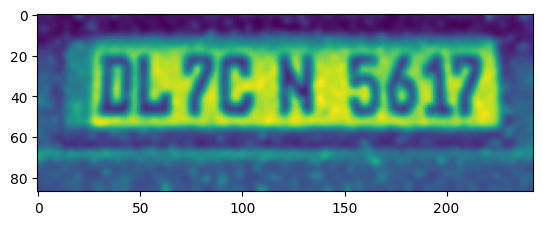

In [6]:
plt.imshow(blurred_images[0])

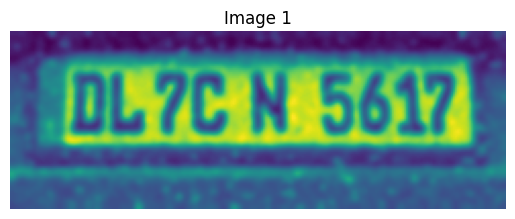

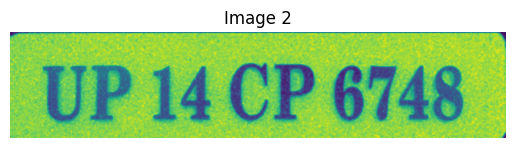

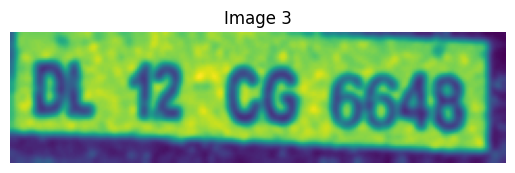

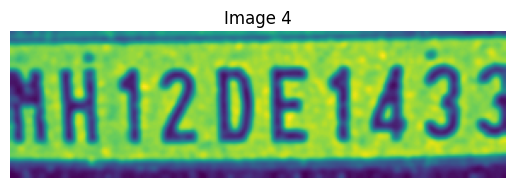

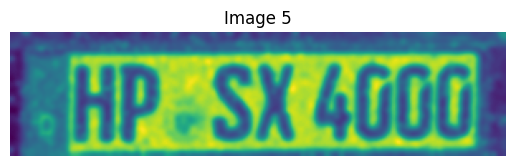

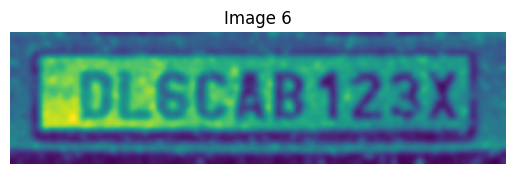

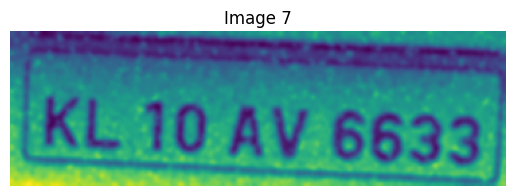

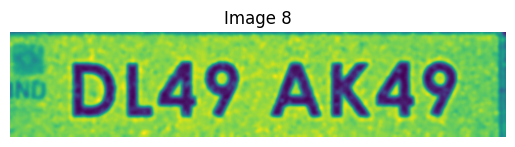

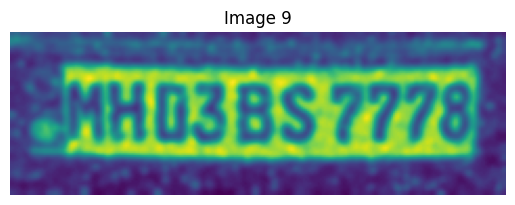

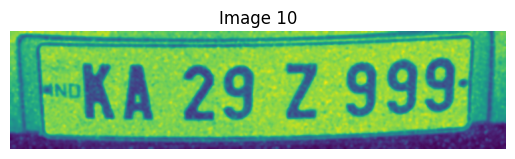

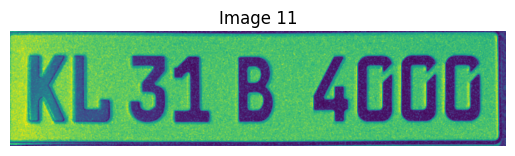

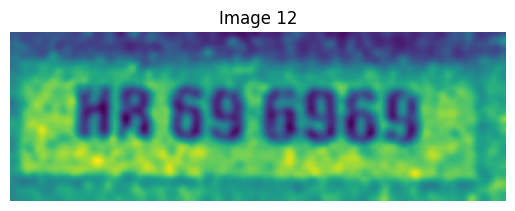

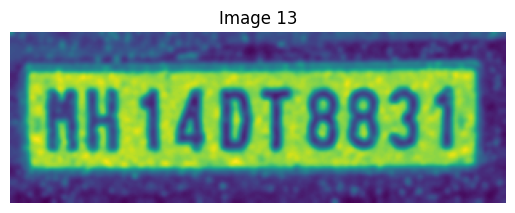

In [7]:
for idx, image in enumerate(blurred_images):
    plt.figure()
    plt.imshow(image)  # Convert BGR to RGB
    plt.title(f"Image {idx+1}")
    plt.axis('off')  # Turn off axis
    plt.show()

Contrast Enhancement



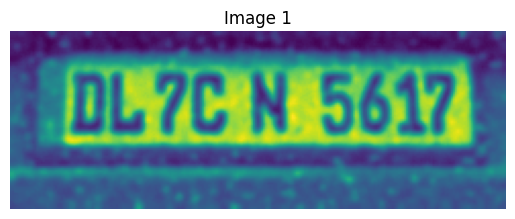

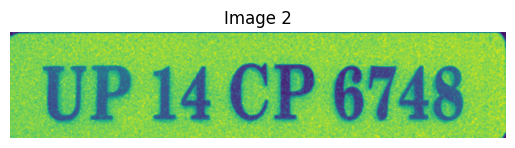

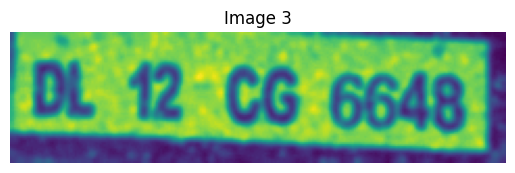

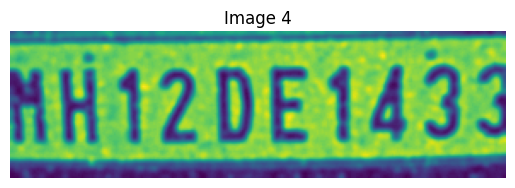

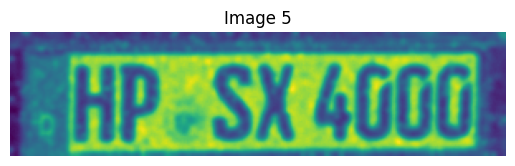

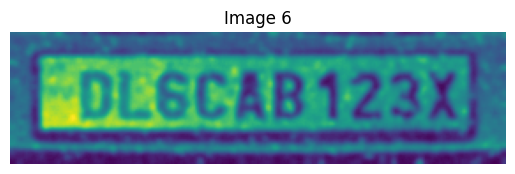

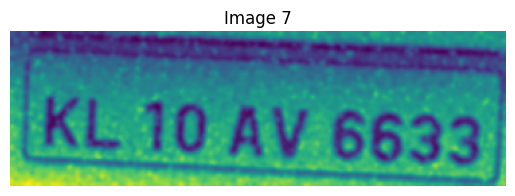

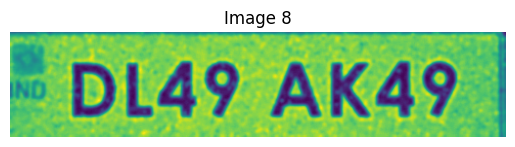

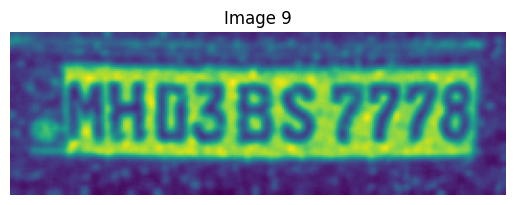

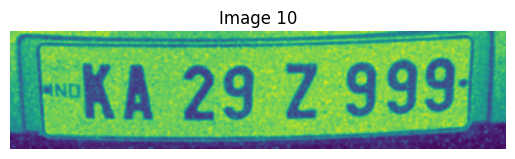

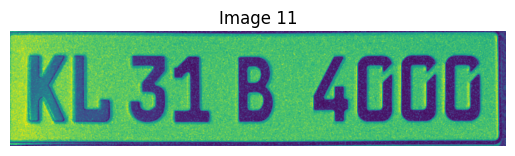

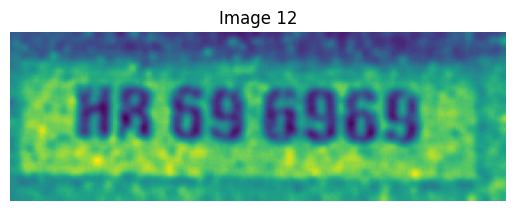

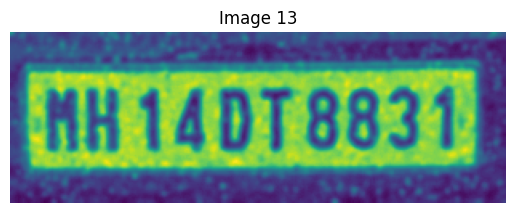

In [8]:
sharpened_images = []

# Iterate over each image in the array
for image in blurred_images:
    # Convert the image to grayscale
    gray = image

    # Apply Laplacian filter to detect edges
    laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)

    # Increase the strength of the sharpening effect
    sharpened_img = cv2.convertScaleAbs(gray - 0.1 * laplacian)

    # Append the sharpened image to the array
    sharpened_images.append(sharpened_img)

for idx, image in enumerate(sharpened_images):
    plt.figure()
    plt.imshow(image)
    plt.title(f"Image {idx+1}")
    plt.axis('off')  # Turn off axis
    plt.show()


Apply Gamma correction

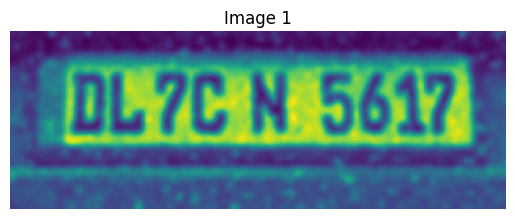

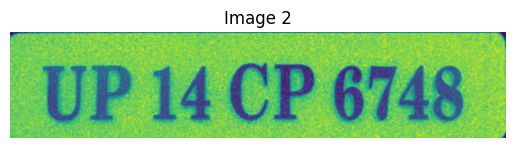

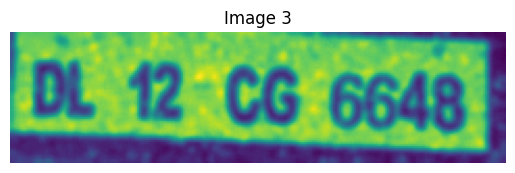

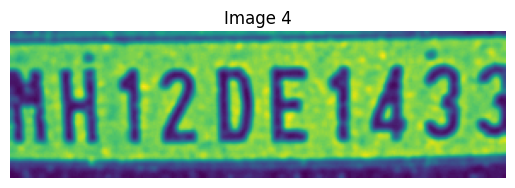

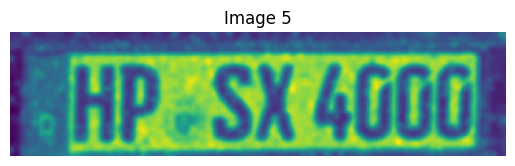

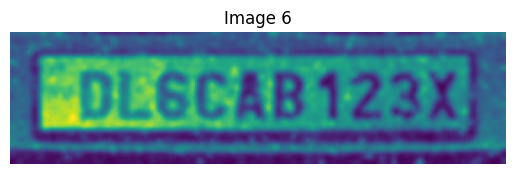

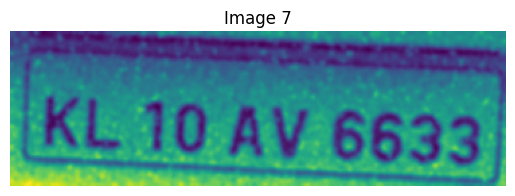

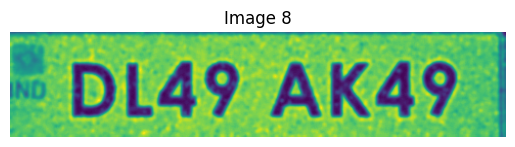

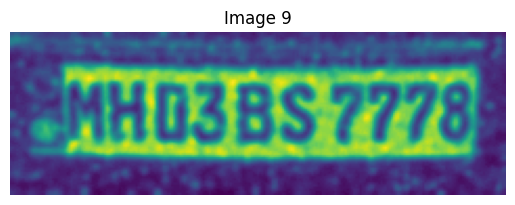

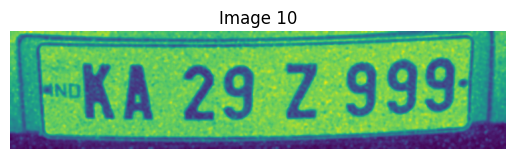

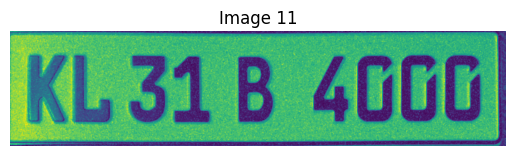

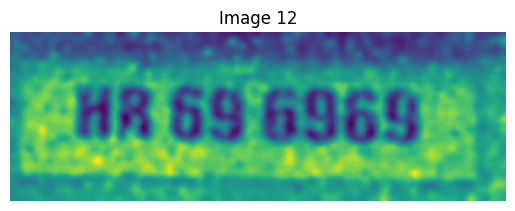

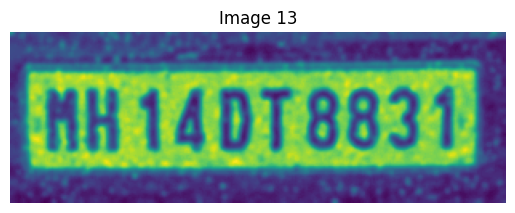

In [9]:
# Define gamma value for gamma correction
gamma = 0.9  # Adjust gamma value as needed
# Apply gamma correction to each image in the array
processed_images = []
for image in sharpened_images:
    # Calculate gamma correction table
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype(np.uint8)

    # Apply gamma correction
    gamma_corrected_image = cv2.LUT(image, table)
    # Append the processed image to the list
    processed_images.append(gamma_corrected_image)

for idx, image in enumerate(processed_images):
    plt.figure()
    plt.imshow(image)
    plt.title(f"Image {idx+1}")
    plt.axis('off')  # Turn off axis
    plt.show()

In [10]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [11]:
import easyocr

In [13]:
reader = easyocr.Reader(['en'], gpu = True)
# Define the list of characters you want to allow
allowed_characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for image in processed_images:
  results = reader.readtext(image,allowlist=allowed_characters)
  print(results)
  print(".")

[([[23, 13], [225, 13], [225, 57], [23, 57]], 'DLZCN5617', 0.4679587525612845)]
.
[([[78, 70], [1274, 70], [1274, 262], [78, 262]], 'UP14CP6748', 0.6844606223094094)]
.
[([[2, 6], [226, 6], [226, 54], [2, 54]], 'DL12CG6648', 0.8437282022228374)]
.
[([[0, 5], [291, 5], [291, 78], [0, 78]], 'HH12DE143Z', 0.10871306495576424)]
.
[([[26, 6], [292, 6], [292, 75], [26, 75]], 'HPESXG00', 0.19572763395573692)]
.
[([[31, 10], [262, 10], [262, 61], [31, 61]], 'DLGCLB1237', 0.309604480034455)]
.
[([[16, 38], [361, 38], [361, 110], [16, 110]], 'KLIQAV6633', 0.6744147564027667)]
.
[([[0, 44], [38, 44], [38, 70], [0, 70]], 'ND', 0.7104303758224771), ([[52, 16], [446, 16], [446, 95], [52, 95]], 'DL49AK49', 0.9977750958728817)]
.
[([[16, 12], [228, 12], [228, 64], [16, 64]], 'MH03BS7778', 0.3708624112650662)]
.
[([[48, 74], [112, 74], [112, 106], [48, 106]], 'AND', 0.8017675229899069), ([[96, 24], [692, 24], [692, 145], [96, 145]], 'KA2929991', 0.6433184330076418)]
.
[([[42, 75], [1160, 75], [1160, 42